### Probando rutas

In [1]:
# import sys
# sys.path.append("D:\\Proyectos\\Cursos\\Tutorias_sabados\\Tutorias_DS")
# from Jonatan_Domz.Introduccion_pytorch.Assets.config_parameters import InitConfigLoader
# sys.path.remove("D:\\Proyectos\\Cursos\\Tutorias_sabados\\Tutorias_DS")

# Inicio

In [29]:
import numpy as np

primer = np.array([3,4,5])
segundo = np.array([[3,4,5],
                    [1,2,3]])
tercer = np.array([[[3,4,5],[1,2,3], [3,5,2]],
                   [[6,5,4],[2,4,8], [3,5,2]]])

In [30]:
type([[[3,4,5],[1,2,3]],[[6,5,4],[2,4,8]]])

list

In [31]:
type(primer)

numpy.ndarray

In [32]:
primer.shape, segundo.shape, tercer.shape

((3,), (2, 3), (2, 3, 3))

# Tensores

¿Qué son?
* Los tensores son estructuras de datos multidimensionales similares a los arrays de NumPy, pero con la capacidad de realizar cálculos en la GPU para acelerar el procesamiento.
* Un tensor puede tener una dimensión (vector), dos dimensiones (matriz), o más dimensiones (tensor de orden superior). Las dimensiones también se conocen como ejes o ejes de un tensor.


In [33]:
import torch

In [7]:
try:
  print(torch.cuda.is_available())
  print(torch.cuda.device_count())
  print(torch.cuda.current_device())
  print(torch.cuda.device(0))
  print(torch.cuda.get_device_name(0))
except:
  pass

True
1
0
NVIDIA GeForce RTX 4080


In [8]:
!nvidia-smi

Sat Oct 12 07:38:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   34C    P8             20W /  320W |     611MiB /  16376MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
try:
  print(torch.cuda.is_available())
  print(torch.cuda.device_count())
  print(torch.cuda.current_device())
  print(torch.cuda.device(0))
  print(torch.cuda.get_device_name(0))
except:
  pass

True
1
0
NVIDIA GeForce RTX 4080


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [34]:
# Crear tensores en la CPU
tensor_cpu = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print(tensor_cpu)

# Verificar dispositivo
print("Dispositivo del tensor:", tensor_cpu.device)

# Transferir tensor a GPU si está disponible
if torch.cuda.is_available():
    tensor_gpu = tensor_cpu.to('cuda')
    print("\nTensor en GPU:")
    print(tensor_gpu)
    print("Dispositivo del tensor:", tensor_gpu.device)
else:
    print("\nCUDA no está disponible. Ejecuta este código en una máquina con GPU para ver la transferencia.")

# Realizar una operación básica en la GPU
if torch.cuda.is_available():
    result_gpu = tensor_gpu * 2
    print("\nResultado de la operación en GPU:")
    print(result_gpu)

    # Transferir el tensor de vuelta a la CPU
    result_cpu = result_gpu.to('cpu')
    print("\nTensor transferido de vuelta a CPU:")
    print(result_cpu)
else:
    # Realizar la misma operación en CPU
    result_cpu = tensor_cpu * 2
    print("\nResultado de la operación en CPU:")
    print(result_cpu)


tensor([[1., 2.],
        [3., 4.]])
Dispositivo del tensor: cpu

Tensor en GPU:
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')
Dispositivo del tensor: cuda:0

Resultado de la operación en GPU:
tensor([[2., 4.],
        [6., 8.]], device='cuda:0')

Tensor transferido de vuelta a CPU:
tensor([[2., 4.],
        [6., 8.]])


In [12]:
tensor_cpu_32 = torch.tensor([[1, 2], [3, 4]], dtype=torch.uint8)
tensor_cpu_8 = torch.tensor([[1, 2], [3, 4]], dtype=torch.uint8)

In [35]:
tensor_new = tensor_cpu_32 + tensor_cpu_8
tensor_new.dtype

torch.uint8

## Operaciones

Operaciones con Tensores:

* Operaciones Aritméticas: Se pueden realizar operaciones element-wise (por elemento) en tensores, como suma, resta, multiplicación y división. Estas operaciones se aplican de manera automática a cada elemento del tensor.
* Operaciones de Reducción: Operaciones como sum, mean, max, min que reducen un tensor a un solo valor o a un tensor con menos dimensiones.
* Operaciones de Transformación: Operaciones como reshape, view, transpose, unsqueeze y squeeze que modifican las dimensiones del tensor sin cambiar sus datos subyacentes.

Cambio de Dimensiones:

* reshape y view: Cambian la forma del tensor sin alterar sus datos. reshape devuelve un nuevo tensor con la forma deseada, mientras que view es una vista del tensor original.
* transpose y permute: Cambian el orden de las dimensiones del tensor. transpose intercambia dos dimensiones específicas, mientras que permute reordena todas las dimensiones.
* unsqueeze y squeeze: unsqueeze agrega una dimensión de tamaño 1 en una posición especificada, y squeeze elimina dimensiones de tamaño 1.

In [84]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
tensor_2 = torch.tensor([[[1, 2, 3, 4],[5,6,7,8]],
                          [[10, 20, 30,40],[50,60,70,80]],
                            [[11, 21, 31,41],[51,61,71,81]]], dtype=torch.float32)

In [37]:
tensor_2.permute(1,0,2).shape, tensor_2.permute(1,0,2)

(torch.Size([2, 3, 4]),
 tensor([[[ 1.,  2.,  3.,  4.],
          [10., 20., 30., 40.],
          [11., 21., 31., 41.]],
 
         [[ 5.,  6.,  7.,  8.],
          [50., 60., 70., 80.],
          [51., 61., 71., 81.]]]))

In [ ]:
1->2
0->3
2->4

In [16]:
tensor.shape, tensor_2.shape

(torch.Size([2, 3]), torch.Size([3, 2, 4]))

In [38]:
#¿elem x lista? = dimensiones del tensor
sum([1, 1, 4])

6

In [39]:
tensor.sum()

tensor(21.)

In [40]:
new = tensor + tensor_2
print(new.shape, new)

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 2

A = [1,2,3]  [a_11,a_12,a_13]
              [a_21,a_22,a23]
               [a_31,a_32,a_33]
    [4,5,6]
    [7,8,9]

A_T = [1,4,7]   [a_11,a_21,a_31]
      [2,5,8]   [a_12,a_22,a_32]
      [3,6,9]   [a_13,a23,a_33]

In [20]:
tensor, tensor.shape, tensor_2, tensor_2.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 torch.Size([2, 3]),
 tensor([[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.]],
 
         [[10., 20., 30., 40.],
          [50., 60., 70., 80.]],
 
         [[11., 21., 31., 41.],
          [51., 61., 71., 81.]]]),
 torch.Size([3, 2, 4]))

In [75]:
tensor = torch.tensor([[1,2,3]])
tensor2 = torch.tensor([[3,4,5,1],
                        [4,4,5,1],
                        [5,4,5,1]])

In [70]:
tensor.shape, tensor2.shape

(torch.Size([1, 3]), torch.Size([3, 3]))

In [71]:
tensor + tensor2

tensor([[4, 6, 8],
        [5, 6, 8],
        [6, 6, 8]])

In [43]:
new = tensor + tensor_2.reshape(4,2,3)
print(tensor.shape, tensor_2.reshape(4,2,3).shape)
print(new.shape, new)

torch.Size([2, 3]) torch.Size([4, 2, 3])
torch.Size([4, 2, 3]) tensor([[[ 2.,  4.,  6.],
         [ 8., 10., 12.]],

        [[ 8., 10., 13.],
         [24., 35., 46.]],

        [[51., 62., 73.],
         [84., 16., 27.]],

        [[32., 43., 54.],
         [65., 76., 87.]]])


In [22]:
2*3 == 3*2

True

In [72]:
tensor.reshape(3,2)

RuntimeError: shape '[3, 2]' is invalid for input of size 3

In [76]:
tensor2, tensor2.shape

(tensor([[3, 4, 5, 1],
         [4, 4, 5, 1],
         [5, 4, 5, 1]]),
 torch.Size([3, 4]))

In [77]:
3*4 == 2*6

True

In [83]:
tensor2.reshape(2,6)

tensor([[3, 4, 5, 1, 4, 4],
        [5, 1, 5, 4, 5, 1]])

In [85]:
tensor_view = tensor.view(3, 2)

In [86]:
tensor_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [87]:
tensor, tensor.T

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([[1., 4.],
         [2., 5.],
         [3., 6.]]))

In [27]:
tensor_permuted = tensor.permute(1, 0)

In [28]:
tensor_permuted

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [88]:
import torch

# Crear un tensor
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
print("Tensor original:")
print(tensor)

# Operaciones Aritméticas
tensor_add = tensor + 10
tensor_mul = tensor * 2
print("\nTensor después de suma:")
print(tensor_add)
print("\nTensor después de multiplicación:")
print(tensor_mul)

# Operaciones de Reducción
tensor_sum = tensor.sum()
tensor_mean = tensor.mean()
print("\nSuma de todos los elementos:")
print(tensor_sum)
print("\nMedia de todos los elementos:")
print(tensor_mean)

# Cambio de Dimensiones
# Reshape
tensor_reshaped = tensor.reshape(3, 2)
print("\nTensor después de reshape:")
print(tensor_reshaped)

# View
tensor_view = tensor.view(3, 2)
print("\nTensor después de view:")
print(tensor_view)

# Transpose
tensor_transposed = tensor.T
print("\nTensor después de transpose:")
print(tensor_transposed)

# Permute
tensor_permuted = tensor.permute(1, 0)
print("\nTensor después de permute:")
print(tensor_permuted)

# Unsqueeze y Squeeze
tensor_unsqueezed = tensor.unsqueeze(0)
print("\nTensor después de unsqueeze en la dimensión 0:")
print(tensor_unsqueezed)

tensor_squeezed = tensor_unsqueezed.squeeze(0)
print("\nTensor después de squeeze en la dimensión 0:")
print(tensor_squeezed)

Tensor original:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Tensor después de suma:
tensor([[11., 12., 13.],
        [14., 15., 16.]])

Tensor después de multiplicación:
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

Suma de todos los elementos:
tensor(21.)

Media de todos los elementos:
tensor(3.5000)

Tensor después de reshape:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

Tensor después de view:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

Tensor después de transpose:
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

Tensor después de permute:
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

Tensor después de unsqueeze en la dimensión 0:
tensor([[[1., 2., 3.],
         [4., 5., 6.]]])

Tensor después de squeeze en la dimensión 0:
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# Dataset

¿Que es?

* Un dataset en PyTorch es una colección de datos que se puede utilizar para entrenar y evaluar modelos. PyTorch proporciona la clase Dataset para representar datos y la clase DataLoader para manejar la carga de datos de manera eficiente durante el entrenamiento.
* Un dataset suele ser una colección de ejemplos, donde cada ejemplo puede ser un par (entrada, etiqueta). En el contexto de PyTorch, se pueden definir datasets personalizados extendiendo la clase Dataset y sobrescribiendo los métodos __len__ y __getitem__.

In [89]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# Cargar el dataset Titanic
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)

In [90]:
# Variable objetivo Survived, las demás nos harán el favor de ser la variables predictoras o independientes
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [91]:
# OJO no podemos meter variables que no sean númericas a nuestra red,
# ¿pero que una palabra no es numérica y si funciona o como funciona gpt?
# Si pero por eso se usan Embeddings!!!!!!!

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [93]:
for column in ['Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Age', 'Fare']:
  data[f'{column}_normalized'] = scaler.fit_transform(data[[f'{column}']])

## también existe la transformación en one-hot encoder

In [94]:
data[['Pclass_1', 'Pclass_2', 'Pclass_3']] = pd.get_dummies(data['Pclass'].apply(lambda x: str(x)))*1
data[['Sex_f', 'Sex_m']] = pd.get_dummies(data['Sex'])*1

In [95]:
data.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Siblings/Spouses Aboard_normalized,Parents/Children Aboard_normalized,Age_normalized,Fare_normalized,Pclass_1,Pclass_2,Pclass_3,Sex_f,Sex_m
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0.125,0.0,0.271174,0.014151,0,0,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0.125,0.0,0.472229,0.139136,1,0,0,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0.000,0.0,0.321438,0.015469,0,0,1,1,0


"""métodos de imputación

In [96]:
# Definir un Dataset personalizado
class TitanicDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.features = self.dataframe[[ 'Age_normalized', 'Fare_normalized', 'Siblings/Spouses Aboard_normalized', 'Parents/Children Aboard_normalized', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_f', 'Sex_m']].fillna(0).values
        self.labels = self.dataframe['Survived'].values

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        features = torch.tensor(self.features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return features, label

In [97]:
Dataset = TitanicDataset(data)

In [45]:
Dataset.dataframe.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Siblings/Spouses Aboard_normalized,Parents/Children Aboard_normalized,Age_normalized,Fare_normalized,Pclass_1,Pclass_2,Pclass_3,Sex_f,Sex_m
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0.125,0.0,0.271174,0.014151,0,0,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0.125,0.0,0.472229,0.139136,1,0,0,1,0


In [98]:
Dataset.features

array([[0.27117366, 0.01415106, 0.125     , ..., 1.        , 0.        ,
        1.        ],
       [0.4722292 , 0.13913574, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.08268409, 0.04577135, 0.125     , ..., 1.        , 1.        ,
        0.        ],
       [0.32143755, 0.0585561 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39683338, 0.01512699, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [99]:
Dataset.labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [102]:
Dataset.__getitem__(2)

(tensor([0.3214, 0.0155, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000]),
 tensor(1.))

### Ejemplo

In [103]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset

d:\Proyectos\Cursos\Tutorias_sabados\Tutorias_azul\amb_intro_pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
# Cargar un dataset de Hugging Face
dataset = load_dataset("ag_news")

# Imprimir las primeras filas del dataset
print(dataset["train"][0])

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}


In [105]:
df = pd.DataFrame(dataset['train'])

In [106]:
df.label.unique()

array([2, 3, 1, 0], dtype=int64)

In [110]:
df.head(5)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


### elipsis

In [107]:
#!pip install sentence-transformers -q
from sentence_transformers import SentenceTransformer

In [108]:
model = SentenceTransformer('all-MiniLM-L6-v2')

d:\Proyectos\Cursos\Tutorias_sabados\Tutorias_azul\amb_intro_pytorch\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\byacu\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
d:\Proyectos\Cursos\Tutorias_sabados\Tutorias_azul\amb_intro_

In [109]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [111]:
df.text.head(7).values[0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [112]:
embeddings = model.encode(df.text.head(7).values[0])

d:\Proyectos\Cursos\Tutorias_sabados\Tutorias_azul\amb_intro_pytorch\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [72]:
len(embeddings)

384

In [114]:
embeddings

array([ 7.43863778e-03,  2.85623334e-02,  4.10955511e-02,  1.05001427e-01,
        2.32820809e-02,  3.51258218e-02, -2.14060564e-02, -2.29023565e-02,
        4.94524511e-03, -6.68985844e-02, -5.93039393e-02,  2.45948508e-02,
       -5.12895510e-02, -4.04271483e-02,  6.65589992e-04, -1.17221307e-02,
       -4.34827432e-03,  2.06902064e-02, -2.29350175e-03, -3.47106233e-02,
       -8.01126733e-02, -6.02049716e-02, -2.86629200e-02, -1.86906531e-02,
       -7.84591734e-02,  4.60197516e-02, -4.96721268e-02, -3.33420001e-02,
        5.32347709e-02, -1.26492009e-01, -7.07766861e-02, -6.30815281e-04,
       -2.26125456e-02,  2.00370094e-03,  8.22304282e-03, -6.30250340e-03,
        8.53446499e-03, -4.64321412e-02,  4.35816124e-02,  3.90969031e-02,
        1.36760774e-03, -2.62946133e-02, -5.70246652e-02,  3.29648443e-02,
        1.93821341e-02,  4.52637114e-02,  5.92519455e-02,  5.84026761e-02,
       -2.66224169e-03, -3.10069863e-02,  1.38102286e-02, -2.49957442e-02,
       -3.08281034e-02,  

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer # revises como se calcula el TF-IDF

In [116]:
vectorizer = TfidfVectorizer()

cuenta cuantas veces aparace la misma palabra

In [117]:
df.text.head(7).values[0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [118]:
tfidf_matrix = vectorizer.fit_transform(df.text.values[:20])

In [119]:
feature_names = vectorizer.get_feature_names_out()

In [120]:
tfidf_dense = tfidf_matrix.toarray()

In [121]:
matrix_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)

In [122]:
lst = df.text.head(7).values[0].lower().replace('(','').replace("'",'').replace(')','').replace('\\','').replace('-','').replace(',','').replace('.','').replace('','').split(' ')

In [123]:
lst = [x for x in lst if x not in ['','shortsellers', 'streets', 'dwindlingband', 'ultracynics']]

In [124]:
# sparse tensor
df.text.head(8).values[7]

'Fed minutes show dissent over inflation (USATODAY.com) USATODAY.com - Retail sales bounced back a bit in July, and new claims for jobless benefits fell last week, the government said Thursday, indicating the economy is improving from a midsummer slump.'

In [125]:
matrix_tfidf[lst].head(2)

,wall,st,bears,claw,back,into,the,black,reuters,reuters,wall,of,are,seeing,green,again
0,0.427449,0.213724,0.213724,0.213724,0.176664,0.213724,0.083733,0.213724,0.226299,0.226299,0.427449,0.126377,0.163437,0.213724,0.213724,0.213724
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120734,0.000000,0.163149,0.163149,0.000000,0.091111,0.000000,0.000000,0.000000,0.000000


In [126]:
matrix_tfidf

,000,17,19,32,36,46,55,70,849,8bn,...,why,with,work,world,worries,year,york,you,your,yusgiantoro
0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.176795,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.167831,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.00000,0.000000,0.000000,0.00000,0.124573,0.157057,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.314113,0.000000,0.000000,0.000000,0.00000
6,0.00000,0.164142,0.000000,0.00000,0.260387,0.000000,0.000000,0.00000,0.164142,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.11556,0.000000,0.000000,0.11556,0.091659,0.000000,0.000000,0.11556,0.000000,0.000000,...,0.000000,0.000000,0.11556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.175269,0.000000,0.000000,0.00000


* opciones para convertir texto a algo numérico:

* traernos un embedding de deeplearning
  * pros:
      - facilidad de procesamiento
      - Mejor entendimiento del contexto del texto
      - flexible a cambio entre palabras con similaridad semántica
  * contras:
      - Es computacionalmente costoso (dependiendo del modelo)
      - Puede ser que el problema no sea tan complejo para su uso.
* sparse tensors
  * Bag of words
  * TF - IDF  (term frecuency- inverse Term frecuency)
  * BM25

### Seguimos

In [84]:
# !pip install sentence-transformers -q
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

d:\Proyectos\Cursos\Tutorias_sabados\amb_intro_pytorch\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [85]:
class Dataset_artur(Dataset):
  def __init__(self, dataframe):
    self.dataframe = dataframe #no es necesaria

    self.features = torch.tensor(dataframe['text'].fillna(0).apply(lambda x: model.encode(x)), dtype=torch.float32) #¿Con que variable pretendo predecir ('target')?
    self.labels = torch.tensor(dataframe['label'].values, dtype=torch.float32) # Son valores que quiero predecir, rellenar, saber (¿por qué? por que no lo tengo)

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    features = self.features[idx]
    label = self.labels[idx]
    return features, label

In [86]:
dataset_artur = Dataset_artur(df.sample(20).reset_index(drop=True))

C:\Users\byacu\AppData\Local\Temp\ipykernel_17784\1767292603.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  self.features = torch.tensor(dataframe['text'].fillna(0).apply(lambda x: model.encode(x)), dtype=torch.float32) #¿Con que variable pretendo predecir ('target')?


In [87]:
dataset_artur

In [88]:
dataset_artur.features.shape

torch.Size([20, 384])

In [89]:
display(dataset_artur.dataframe.head(2))
display(dataset_artur.features)
display(dataset_artur.labels)

,text,label
0,Top 10 Portfolio Pitfalls Whatever problems yo...,2
1,"Oil Below \$53, Fuel Costs Hit Economy LONDON...",2


tensor([[ 0.0167, -0.0454,  0.0016,  ..., -0.0370, -0.0851,  0.0598],
        [-0.0151,  0.0036,  0.1426,  ..., -0.0659, -0.0029,  0.0765],
        [ 0.0054,  0.0530,  0.0408,  ..., -0.0243, -0.0837, -0.0263],
        ...,
        [ 0.1059, -0.0202,  0.0010,  ...,  0.0130, -0.0192,  0.0405],
        [ 0.0099, -0.0414, -0.0005,  ..., -0.0089,  0.0032, -0.0325],
        [ 0.0838, -0.0774, -0.0262,  ..., -0.0303,  0.0504,  0.0288]])

tensor([2., 2., 0., 3., 1., 3., 0., 0., 3., 3., 2., 2., 3., 0., 2., 3., 1., 0.,
        0., 2.])

# DataLoader

El DataLoader es una clase de PyTorch que facilita la carga y gestión de datos en lotes (batches) durante el entrenamiento de modelos. Permite iterar sobre los datos de manera eficiente, manejar el shuffling de datos, y cargar datos en paralelo usando múltiples procesos.

Funciones Principales:

* Batching: Agrupa ejemplos individuales en lotes. Esto es esencial para entrenar modelos, ya que permite procesar varios ejemplos en una sola pasada.
* Shuffling: Aleatoriza el orden de los datos en cada época para evitar que el modelo se adapte a un orden específico.
* Parallel Loading: Utiliza múltiples procesos para cargar datos en paralelo, lo que puede acelerar el entrenamiento al reducir el tiempo de espera para la carga de datos.

Parámetros Clave:

* dataset: El dataset que proporciona los datos.
* batch_size: Número de ejemplos en cada lote.
* shuffle: Booleano que indica si los datos deben ser barajados al comienzo de cada época.
* num_workers: Número de procesos que se utilizarán para cargar datos en paralelo.

In [49]:
# Crear el dataset y el DataLoader
dataset = TitanicDataset(data)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [50]:
for counter, batch in enumerate(dataloader):
  print(batch)
  if counter == 0:
    break

[tensor([[0.4220, 0.0634, 0.1250, 0.1667, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.1958, 0.0671, 0.1250, 0.5000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.2209, 0.0141, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.2712, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.5728, 0.0241, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.2963, 0.0454, 0.2500, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.1455, 0.0219, 0.1250, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.2712, 0.0154, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000]]), tensor([1., 0., 0., 0., 1., 1., 1., 0.])]


In [51]:
# Ejemplo de iteración sobre el DataLoader
for batch in dataloader:
    features, labels = batch
    print("Features:", features)
    print("Labels:", labels)
    break

Features: tensor([[0.2837, 0.0254, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.8618, 0.0283, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.3466, 0.0153, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.5225, 0.2164, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.5979, 0.1015, 0.1250, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.4722, 0.0138, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
        [0.4974, 0.2995, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.5225, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000]])
Labels: tensor([0., 0., 0., 1., 1., 0., 1., 0.])


### ejercicio

Hacer el dataloader del dataset_artur

# Arquitectura

## **Funciones de activación**

Las funciones de activación introducen no linealidades en la red neuronal, permitiendo que el modelo aprenda patrones complejos. Aquí están algunas de las más comunes:

* ReLU (Rectified Linear Unit):

Definición:
$ f(x) = \max(0, x) $

Ventajas: Rápida de calcular, reduce el problema del desvanecimiento del gradiente (vanishing gradient).
Uso común: Capa oculta de redes neuronales profundas.

* Sigmoide:

Definición:
$f(x) = \frac{1}{1 + e^{-x}}$

Ventajas: Produce salidas en el rango (0, 1), útil para problemas de clasificación binaria.
Desventajas: Puede sufrir del problema de gradientes desvanecidos, especialmente en redes profundas.
* Tanh (Tangente Hiperbólica):

Definición:
$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

Ventajas: Produce salidas en el rango (-1, 1), centrado en 0.
Desventajas: También puede sufrir del problema de gradientes desvanecidos.
* Leaky ReLU:

Definición:
$f(x) = \max(\alpha x, x)$

α es un pequeño coeficiente positivo.
Ventajas: Permite que el gradiente fluya para valores negativos, ayudando a evitar el problema de neuronas muertas.
Uso común: Alternativa a ReLU en redes neuronales profundas.
* Softmax:

Definición:
$f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$

Ventajas: Convierte los logits en probabilidades que suman 1, útil para problemas de clasificación multiclase.
Uso común: Capa de salida en problemas de clasificación multiclase.

##  **Técnicas de Pooling**

Pooling reduce la dimensionalidad de las representaciones intermedias, ayudando a reducir el costo computacional y evitar el sobreajuste (overfitting).

* Max Pooling:

Definición: Selecciona el valor máximo en una región del tensor.
Ventajas: Preserva las características más prominentes en una región.
Uso común: Capas de pooling en redes neuronales convolucionales (CNNs).
* Average Pooling:

Definición: Calcula el promedio de los valores en una región del tensor.
Ventajas: Proporciona una representación más suavizada.
Uso común: Alternativa a max pooling en redes neuronales convolucionales.


## **Capas de Normalización**

La normalización ayuda a estabilizar el entrenamiento y acelerar la convergencia al estandarizar las entradas a cada capa.

* Batch Normalization:

Definición: Normaliza las salidas de una capa para cada mini-batch, ajustando los datos a una media de 0 y una desviación estándar de 1.
Ventajas: Reduce la covariancia interna del cambio (internal covariate shift), mejora la velocidad de entrenamiento.
Uso común: Generalmente se aplica después de la activación en cada capa oculta.
* Layer Normalization:

Definición: Normaliza las salidas de una capa para cada ejemplo en lugar de cada mini-batch.
Ventajas: Menos sensible al tamaño del mini-batch, útil para modelos recurrentes.
Uso común: Aplicada en modelos de redes neuronales recurrentes (RNNs) y transformadores.


## **Dropout**

Dropout es una técnica de regularización que ayuda a prevenir el sobreajuste (overfitting) al "apagar" aleatoriamente una fracción de neuronas durante el entrenamiento.

Definición:
Funcionamiento: Durante el entrenamiento, una fracción de las neuronas se establece en cero de manera aleatoria en cada paso del entrenamiento.
Ventajas: Forza a la red a aprender representaciones más robustas y generalizables.
Uso común: Se aplica en capas ocultas de la red durante el entrenamiento.

# código

In [52]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [53]:
class TitanicClassifier(nn.Module):
    def __init__(self, input ,output):
        super(TitanicClassifier, self).__init__()
        self.fc1 = nn.Linear(input, 6)
        self.fc2 = nn.Linear(6, output)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [54]:
model = TitanicClassifier(9,1)

In [55]:
model

TitanicClassifier(
  (fc1): Linear(in_features=9, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

# Optimizadores

Los optimizadores son algoritmos que ajustan los pesos de una red neuronal para minimizar la función de pérdida durante el entrenamiento. Existen varios tipos de optimizadores, cada uno con sus propias características y ventajas.

**Tipos de Optimizadores**
* SGD (Stochastic Gradient Descent):

Definición: Optimización de gradiente estocástico. Actualiza los pesos utilizando el gradiente calculado en un solo batch o un subconjunto de datos.

Fórmula de Actualización:

$\theta = \theta - \eta \nabla_\theta J(\theta)$

Donde
𝜃 son los pesos,

η es la tasa de aprendizaje, y

J(θ) es la función de pérdida.

Ventajas: Sencillo y fácil de implementar.
Desventajas: Puede ser lento y es sensible a la tasa de aprendizaje. Puede converger a mínimos locales.
Uso común: Baseline para comparación con otros optimizadores.

* Momentum:

Definición: Variante de SGD que acumula gradientes pasados para acelerar el entrenamiento y reducir el impacto de oscilaciones.

Fórmula de Actualización:

$v_t = \beta v_{t-1} + (1 - \beta) \nabla_\theta J(\theta)
\theta = \theta - \eta v_t$

Donde
𝑣
𝑡
v
t
​
  es el término de momento,
𝛽
β es el coeficiente de momento, y
𝜂
η es la tasa de aprendizaje.

Ventajas: Mejora la convergencia al acumular gradientes y reducir oscilaciones.

Desventajas: Requiere ajuste de parámetros adicionales.

Uso común: Para acelerar el entrenamiento y mejorar la convergencia.

*Adam (Adaptive Moment Estimation):

Definición: Optimizador que combina las ideas de momentum y adaptación de tasa de aprendizaje basada en momentos (momentos de primer y segundo orden).

Fórmula de Actualización:

$m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta J(\theta)
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla_\theta J(\theta))^2
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
\theta = \theta - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$

Donde
𝑚
𝑡
m
t
​
  y
𝑣
𝑡
v
t
​
  son las estimaciones de primer y segundo momento,
𝛽
1
β
1
​
  y
𝛽
2
β
2
​
  son coeficientes de momento,
𝜂
η es la tasa de aprendizaje, y
𝜖
ϵ es un pequeño valor para evitar divisiones por cero.

Ventajas: Ajusta automáticamente la tasa de aprendizaje y es generalmente robusto.

Desventajas: Puede ser menos interpretativo en comparación con otros optimizadores.

Uso común: Optimización general para la mayoría de las redes neuronales.

* RMSprop (Root Mean Square Propagation):

Definición: Optimizador que adapta la tasa de aprendizaje para cada parámetro dividiendo el gradiente por una estimación del promedio móvil del cuadrado del gradiente.

Fórmula de Actualización:

$v_t = \beta v_{t-1} + (1 - \beta) (\nabla_\theta J(\theta))^2
\theta = \theta - \eta \frac{\nabla_\theta J(\theta)}{\sqrt{v_t} + \epsilon}$

Donde
𝑣
𝑡
v
t
​
  es el promedio móvil del cuadrado del gradiente,
𝛽
β es el coeficiente de decaimiento, y
𝜂
η es la tasa de aprendizaje.

Ventajas: Adaptación de la tasa de aprendizaje para cada parámetro, útil para redes neuronales recurrentes.

Desventajas: Requiere ajuste del coeficiente de decaimiento.

Uso común: Para entrenamiento en redes neuronales con características de gradientes muy variados.

* Adagrad (Adaptive Gradient Algorithm):

Definición: Optimiza la tasa de aprendizaje individualmente para cada parámetro basada en la acumulación de gradientes pasados.

Fórmula de Actualización:

$G_{t} = G_{t-1} + (\nabla_\theta J(\theta))^2
\theta = \theta - \frac{\eta \nabla_\theta J(\theta)}{\sqrt{G_{t}} + \epsilon}$

Donde
𝐺
𝑡
G
t
​
  es la acumulación de gradientes al cuadrado.

Ventajas: Adapta la tasa de aprendizaje para cada parámetro.

Desventajas: La tasa de aprendizaje puede volverse muy pequeña con el tiempo.

Uso común: Para problemas con características muy variables.

# codigo

In [56]:
# Definir el optimizador SGD
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
# Definir el optimizador SGD con momentum
optimizer_momentum = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# Definir el optimizador adam
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Definir el optimizador RMSprop
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)
# Definir el optimizador Adagrad
optimizer_adagrad = optim.Adagrad(model.parameters(), lr=0.01)

# Funciones de pérdida

* MSELoss (Mean Squared Error Loss):

Definición: Calcula el error cuadrático medio entre las predicciones del modelo y los valores verdaderos. Es comúnmente utilizada en problemas de regresión.

Fórmula:
$L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

Donde
$𝑦$
y son las etiquetas verdaderas,
$\hat{y}$
  son las predicciones del modelo, y
𝑛 es el número de muestras.

Uso común: Problemas de regresión.


* CrossEntropyLoss:

Definición: Calcula la pérdida de entropía cruzada entre las predicciones del modelo y las etiquetas verdaderas. Es adecuada para problemas de clasificación multiclase.

Fórmula:
$L(y, \hat{y}) = -\sum_{i=1}^{n} y_i \log(\hat{y_i})$

Donde
𝑦
es un vector one-hot de las etiquetas verdaderas, y
$\hat{y}$  son las probabilidades predichas por el modelo.

Uso común: Clasificación multiclase.


* BCELoss (Binary Cross-Entropy Loss):

Definición: Calcula la pérdida de entropía cruzada para problemas de clasificación binaria. A diferencia de CrossEntropyLoss, BCELoss trabaja con una sola salida de probabilidad.

Fórmula:
$L(y, \hat{y}) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)$

Donde
𝑦 es la etiqueta verdadera (0 o 1), y
$\hat{y}$ es la probabilidad predicha.

Uso común: Clasificación binaria.


* BCEWithLogitsLoss:

Definición: Combinación de BCELoss con una función sigmoide interna para la estabilidad numérica. Ideal para clasificación binaria cuando el modelo produce logits en lugar de probabilidades.

Fórmula: Combina Sigmoid y BCELoss en un solo paso para evitar el desbordamiento numérico.

Uso común: Clasificación binaria con logits como salida.


* NLLLoss (Negative Log Likelihood Loss):

Definición: Calcula la pérdida de log-verosimilitud negativa. Se usa comúnmente con LogSoftmax en la capa de salida para problemas de clasificación multiclase.

Fórmula:
$L(y, \hat{y}) = -\log(\hat{y}_y)$

Donde
𝑦
y
$\hat{y}$ es la probabilidad predicha para la clase verdadera
𝑦.

Uso común: Clasificación multiclase con LogSoftmax.


* Huber Loss:

Definición: Pérdida que combina la pérdida cuadrática y la pérdida absoluta, dependiendo de un umbral
𝛿
δ. Es robusta frente a valores atípicos.

Fórmula:
$L(y, \hat{y}) = \begin{cases}
\frac{1}{2} (y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta \\
\delta |y - \hat{y}| - \frac{1}{2} \delta^2 & \text{si } |y - \hat{y}| > \delta
\end{cases}$

Uso común: Regresión robusta frente a valores atípicos.


* KLDivLoss (Kullback-Leibler Divergence Loss):

Definición: Mide la divergencia entre dos distribuciones de probabilidad. Utiliza LogSoftmax para la primera distribución y Softmax para la segunda.

Fórmula:
$L(p, q) = \sum_{i} p_i \log \frac{p_i}{q_i}$

Donde
𝑝
es la distribución verdadera y
𝑞
es la distribución predicha.

Uso común: Comparar distribuciones de probabilidad.

# Código

In [57]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
criterion = nn.NLLLoss()
criterion = nn.SmoothL1Loss()
criterion = nn.KLDivLoss()

# Entonces ¿como se ve una red?

## ejemplo visual

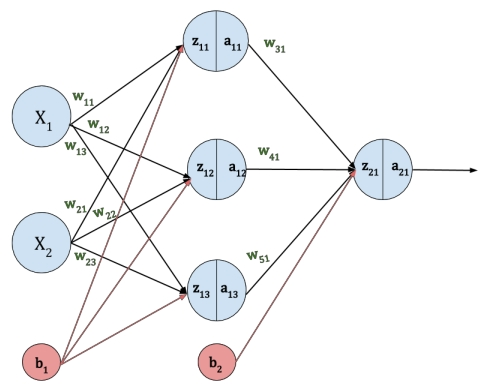

## ejemplo en papel

## 1. Pesos y Sesgos

Cada neurona en una red recibe entradas ponderadas y, opcionalmente, se le suma un sesgo. 

Matemáticamente, esto se expresa como:

$$
𝑧 =𝑤_1
𝑥_1
+
𝑤_2
𝑥_2
+
⋯
+
𝑤_𝑛
𝑥_𝑛
+
𝑏
$$

Donde:

$𝑥_𝑖:$
 son las entradas a la neurona.

$𝑤_𝑖:$
  son los pesos asociados a cada entrada.

𝑏:
 es el sesgo.

𝑧:
 es la salida previa a la aplicación de la función de activación.

La función de activación, como la ReLU (Rectified Linear Unit), la sigmoide o la tanh, transforma esta salida:

**𝑎 = 𝜎(𝑧)**


Donde 

𝑎:
 es la salida activada y 

𝜎:
 es la función de activación.

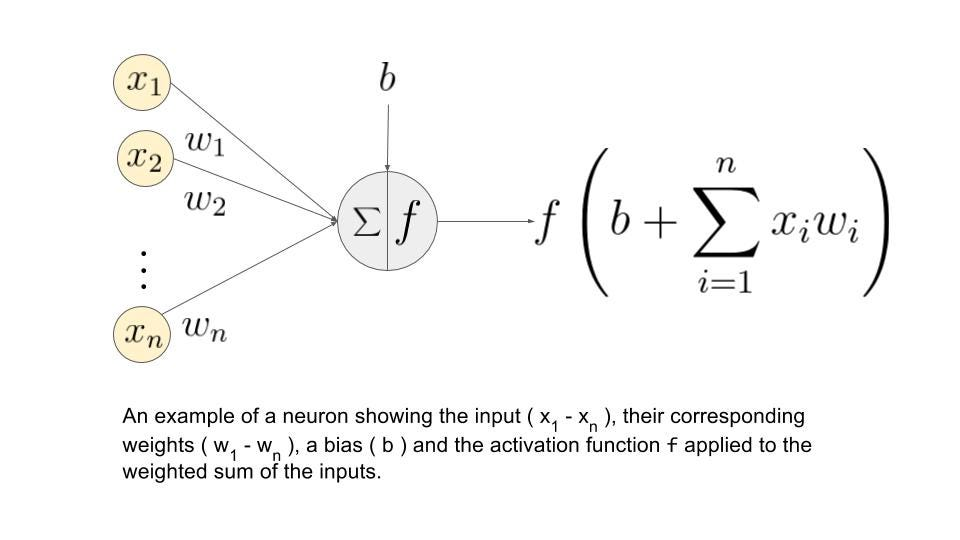

## 2. Feedforward

El proceso feedforward implica calcular la salida de cada neurona en la red desde la capa de entrada hasta la de salida. Para cada capa $l$, el proceso se describe matemáticamente como:

$$
z^l = W^l * a^(l-1) + b^l
$$
$$
a^l = σ(z^l)
$$

Donde:

$W^l$ es la matriz de pesos de la capa l.

$a^(l-1)$ es la salida activada de la capa anterior.

$b^l$ es el vector de sesgos de la capa l.

$z^l$ es la salida de la neurona antes de la activación.

$a^l$ es la salida activada de la capa l.

Este proceso continúa hasta llegar a la capa de salida, donde obtenemos la predicción final de la red.

## 3. Función de Costo

Para medir qué tan bien se está desempeñando la red, usamos una función de costo. Si usamos, por ejemplo, el error cuadrático medio para una tarea de regresión, se define como:

$$
C = (\frac{1}{2m}) * Σ(y^i - ŷ^i)^2
$$

Donde:

$y^i$ es el valor verdadero.

$ŷ^i$ es la predicción de la red.

$m$ es el número de ejemplos en el conjunto de datos.

## 4. Backpropagation

Backpropagation es el algoritmo para ajustar los pesos y sesgos de la red, minimizando la función de costo. Utiliza el gradiente descendente para actualizar los parámetros.

Gradiente Descendente:

La actualización de los pesos y sesgos se realiza en la dirección negativa del gradiente de la función de costo con respecto a cada parámetro:

$$
w_ij ← w_ij - η * (∂C / ∂w_{ij})
b_i ← b_i - η * (∂C / ∂b_i)
$$

Donde:

$η$ es la tasa de aprendizaje.

$∂C / ∂w_{ij}$ es el gradiente de la función de costo con respecto al peso $w_{ij}$.

$∂C / ∂b_i$ es el gradiente de la función de costo con respecto al sesgo $b_i$.



Cálculo de los Gradientes:

Los gradientes se calculan utilizando la regla de la cadena. Para los pesos, el gradiente es:

$$
∂C / ∂w_{ij} = (∂C / ∂a_i) * (∂a_i / ∂z_i) * (∂z_i / ∂w_{ij})
$$

Este proceso involucra tres pasos clave:

1. Propagación hacia adelante (feedforward) para calcular las activaciones.
2. Cálculo de los gradientes hacia atrás (backpropagation).
3. Actualización de los pesos y sesgos.

# Proceso de entrenamiento

In [58]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [59]:
class TitanicClassifier(nn.Module):
    def __init__(self, input ,output):
        super(TitanicClassifier, self).__init__()
        self.fc1 = nn.Linear(input, 6)
        self.fc2 = nn.Linear(6, output)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [60]:
# Inicializar el modelo, la función de pérdida y el optimizador
model = TitanicClassifier(9,1)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loop de entrenamiento
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # tqdm para el seguimiento del progreso
    for batch_data, batch_labels in tqdm(dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_data).squeeze()  # Remove single-dimensional entries
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_data.size(0)

    epoch_loss = running_loss / len(dataset)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print('Entrenamiento completado.')

Epoch 1/50, Loss: 0.6769


Epoch 2/50, Loss: 0.6314


Epoch 3/50, Loss: 0.5962


Epoch 4/50, Loss: 0.5742


Epoch 5/50, Loss: 0.5597


Epoch 6/50, Loss: 0.5492


Epoch 7/50, Loss: 0.5309


Epoch 8/50, Loss: 0.5066


Epoch 9/50, Loss: 0.4880


Epoch 10/50, Loss: 0.4783


Epoch 11/50, Loss: 0.4712


Epoch 12/50, Loss: 0.4666


Epoch 13/50, Loss: 0.4635


Epoch 14/50, Loss: 0.4602


Epoch 15/50, Loss: 0.4582


Epoch 16/50, Loss: 0.4559


Epoch 17/50, Loss: 0.4549


Epoch 18/50, Loss: 0.4524


Epoch 19/50, Loss: 0.4509


Epoch 20/50, Loss: 0.4494


Epoch 21/50, Loss: 0.4482


Epoch 22/50, Loss: 0.4474


Epoch 23/50, Loss: 0.4460


Epoch 24/50, Loss: 0.4449


Epoch 25/50, Loss: 0.4438


Epoch 26/50, Loss: 0.4433


Epoch 27/50, Loss: 0.4421


Epoch 28/50, Loss: 0.4411


Epoch 29/50, Loss: 0.4402


Epoch 30/50, Loss: 0.4393


Epoch 31/50, Loss: 0.4389


Epoch 32/50, Loss: 0.4384


Epoch 33/50, Loss: 0.4372


Epoch 34/50, Loss: 0.4364


Epoch 35/50, Loss: 0.4363


Epoch 36/50, Loss: 0.4355


Epoch 37/50, Loss: 0.4349


Epoch 38/50, Loss: 0.4342


Epoch 39/50, Loss: 0.4337


Epoch 40/50, Loss: 0.4334


Epoch 41/50, Loss: 0.4327


Epoch 42/50, Loss: 0.4322


Epoch 43/50, Loss: 0.4320


Epoch 44/50, Loss: 0.4316


Epoch 45/50, Loss: 0.4311


Epoch 46/50, Loss: 0.4308


Epoch 47/50, Loss: 0.4305


Epoch 48/50, Loss: 0.4302


Epoch 49/50, Loss: 0.4292


Epoch 50/50, Loss: 0.4291
Entrenamiento completado.


In [61]:
class TitanicClassifier_2(nn.Module):
    def __init__(self, input_dim, hidden_layers, output_dim):
        super(TitanicClassifier_2, self).__init__()

        self.hidden_layers = nn.ModuleList()
        current_input_dim = input_dim

        for hidden_dim in hidden_layers:
            self.hidden_layers.append(nn.Linear(current_input_dim, hidden_dim))
            current_input_dim = hidden_dim

        # Capa de salida
        self.output_layer = nn.Linear(current_input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

In [62]:
# Inicializar el modelo, la función de pérdida y el optimizador
hidden_layers = [16, 32, 16]
model_2 = TitanicClassifier_2(9, hidden_layers, 1)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

# Loop de entrenamiento
num_epochs = 50
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0

    # tqdm para el seguimiento del progreso
    for batch_data, batch_labels in tqdm(dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()

        # Forward pass
        outputs = model_2(batch_data).squeeze()  # Remove single-dimensional entries
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_data.size(0)

    epoch_loss = running_loss / len(dataset)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print('Entrenamiento completado.')

Epoch 1/50, Loss: 0.6384


Epoch 2/50, Loss: 0.5075


Epoch 3/50, Loss: 0.4680


Epoch 4/50, Loss: 0.4591


Epoch 5/50, Loss: 0.4511


Epoch 6/50, Loss: 0.4470


Epoch 7/50, Loss: 0.4431


Epoch 8/50, Loss: 0.4417


Epoch 9/50, Loss: 0.4385


Epoch 10/50, Loss: 0.4373


Epoch 11/50, Loss: 0.4325


Epoch 12/50, Loss: 0.4290


Epoch 13/50, Loss: 0.4288


Epoch 14/50, Loss: 0.4262


Epoch 15/50, Loss: 0.4248


Epoch 16/50, Loss: 0.4230


Epoch 17/50, Loss: 0.4208


Epoch 18/50, Loss: 0.4209


Epoch 19/50, Loss: 0.4195


Epoch 20/50, Loss: 0.4165


Epoch 21/50, Loss: 0.4193


Epoch 22/50, Loss: 0.4137


Epoch 23/50, Loss: 0.4169


Epoch 24/50, Loss: 0.4129


Epoch 25/50, Loss: 0.4152


Epoch 26/50, Loss: 0.4136


Epoch 27/50, Loss: 0.4120


Epoch 28/50, Loss: 0.4081


Epoch 29/50, Loss: 0.4101


Epoch 30/50, Loss: 0.4106


Epoch 31/50, Loss: 0.4131


Epoch 32/50, Loss: 0.4135


Epoch 33/50, Loss: 0.4107


Epoch 34/50, Loss: 0.4114


Epoch 35/50, Loss: 0.4103


Epoch 36/50, Loss: 0.4092


Epoch 37/50, Loss: 0.4128


Epoch 38/50, Loss: 0.4095


Epoch 39/50, Loss: 0.4079


Epoch 40/50, Loss: 0.4091


Epoch 41/50, Loss: 0.4110


Epoch 42/50, Loss: 0.4087


Epoch 43/50, Loss: 0.4092


Epoch 44/50, Loss: 0.4065


Epoch 45/50, Loss: 0.4087


Epoch 46/50, Loss: 0.4087


Epoch 47/50, Loss: 0.4051


Epoch 48/50, Loss: 0.4088


Epoch 49/50, Loss: 0.4054


Epoch 50/50, Loss: 0.4047
Entrenamiento completado.
